In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = "D:\data set\pizza\pizza_not_pizza"

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('D:\data set\pizza\pizza_not_pizza')

Found 1966 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

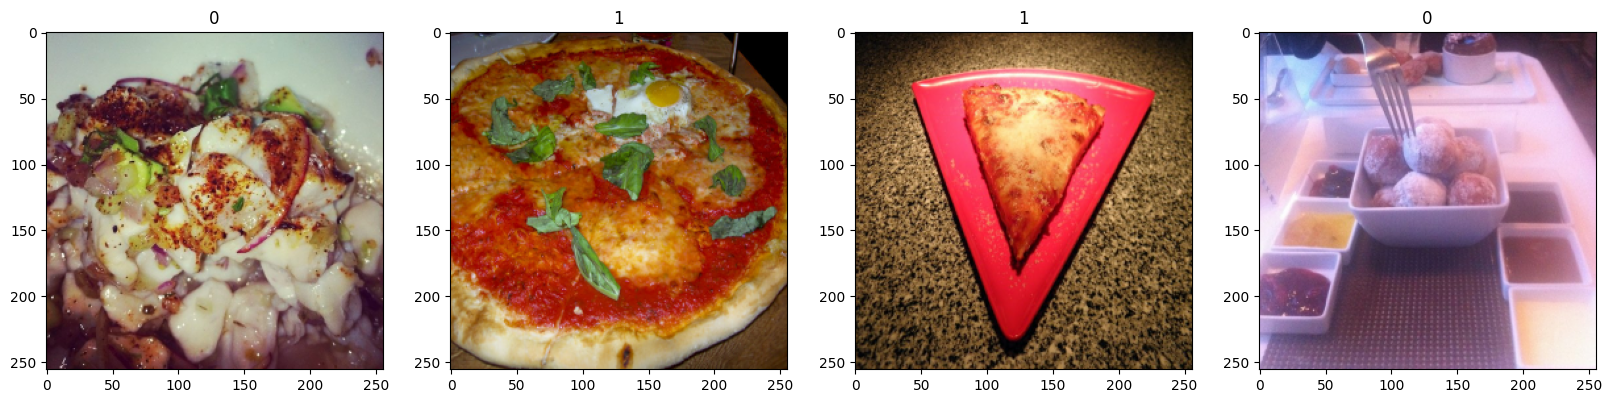

In [12]:
# 1 = pizza
# 0 = not pizza

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[7.33838856e-01, 7.57368267e-01, 8.19102347e-01],
          [7.53385425e-01, 7.76914835e-01, 8.30805779e-01],
          [7.62178302e-01, 7.85707712e-01, 8.32766533e-01],
          ...,
          [7.44148314e-01, 7.32383549e-01, 7.59834588e-01],
          [7.41681993e-01, 7.13725507e-01, 7.15242028e-01],
          [7.18152583e-01, 6.74065590e-01, 6.69638455e-01]],
 
         [[7.42876828e-01, 7.58823514e-01, 8.13097417e-01],
          [7.42953420e-01, 7.66482830e-01, 8.14430118e-01],
          [7.42769599e-01, 7.67815590e-01, 8.11841309e-01],
          ...,
          [7.50091910e-01, 7.38327205e-01, 7.65778184e-01],
          [7.49203444e-01, 7.19791651e-01, 7.28707135e-01],
          [7.27190554e-01, 6.87530637e-01, 6.83164835e-01]],
 
         [[7.40042865e-01, 7.55729139e-01, 7.99126863e-01],
          [7.34466910e-01, 7.57123172e-01, 7.99126863e-01],
          [7.32766569e-01, 7.60217547e-01, 7.97166049e-01],
          ...,
          [7.55208313e-01, 7.49325991e-01, 7.7481

### split data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

43

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### build model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [24]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
43/43 [==============================] - 22s 98ms/step - loss: 0.6861 - accuracy: 0.6054 - val_loss: 0.6299 - val_accuracy: 0.6406
Epoch 2/40
43/43 [==============================] - 5s 107ms/step - loss: 0.5751 - accuracy: 0.7137 - val_loss: 0.5436 - val_accuracy: 0.7474
Epoch 3/40
43/43 [==============================] - 5s 104ms/step - loss: 0.5659 - accuracy: 0.7289 - val_loss: 0.5237 - val_accuracy: 0.7370
Epoch 4/40
43/43 [==============================] - 4s 98ms/step - loss: 0.4460 - accuracy: 0.8060 - val_loss: 0.4610 - val_accuracy: 0.7812
Epoch 5/40
43/43 [==============================] - 5s 101ms/step - loss: 0.3997 - accuracy: 0.8307 - val_loss: 0.4541 - val_accuracy: 0.7995
Epoch 6/40
43/43 [==============================] - 5s 99ms/step - loss: 0.3098 - accuracy: 0.8626 - val_loss: 0.4726 - val_accuracy: 0.8151
Epoch 7/40
43/43 [==============================] - 5s 99ms/step - loss: 0.2619 - accuracy: 0.8975 - val_loss: 0.4762 - val_accuracy: 0.7995
Epoch 8/4

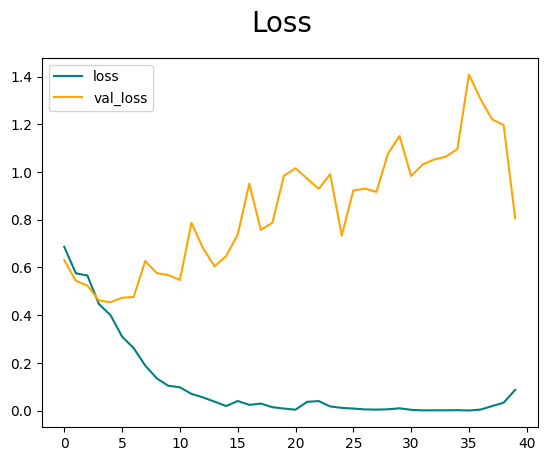

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

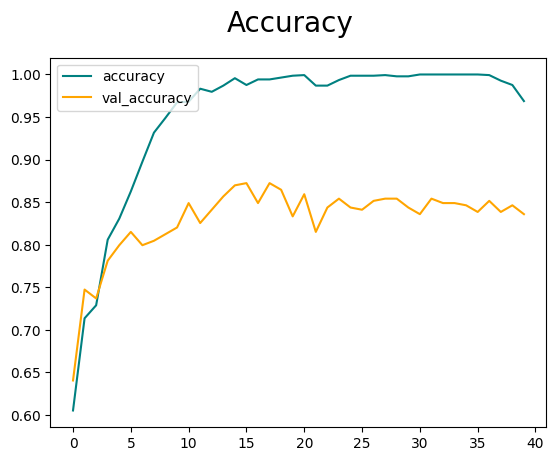

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 60ms/step


In [31]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.81914896, shape=(), dtype=float32) tf.Tensor(0.77, shape=(), dtype=float32) tf.Tensor(0.7916667, shape=(), dtype=float32)


In [32]:
import cv2

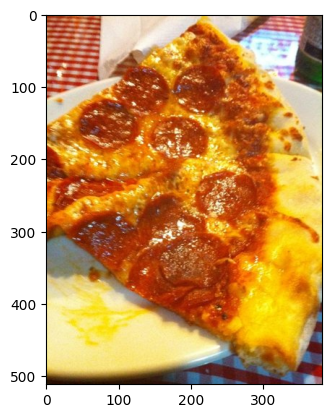

In [48]:
img = cv2.imread("D:/labs/NND/129666.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

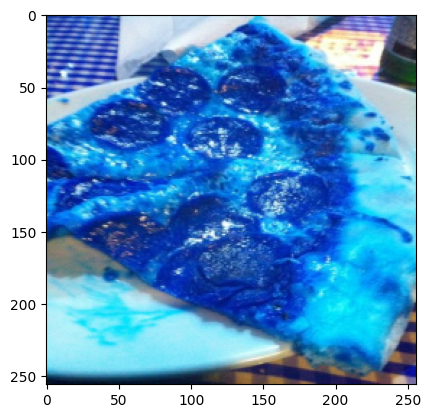

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [51]:
yhat

array([[0.02556097]], dtype=float32)

In [52]:
if yhat > 0.5: 
    print(f'Predicted class is Not pizza')
else:
    print(f'Predicted class is pizza')

Predicted class is pizza
